In [1]:
# Py3_Jupyter_Nb_Pandas(金融MACD指标分析)_GF_2024-01-16.ipynb
# Create By GF 2024-01-16 12:09

In [2]:
import pandas as pd # -> Pandas Version 1.4.1
import matplotlib.pyplot as plt # -> Matplotlib Version 3.6.3

In [3]:
# Matplotlib 相关配置
# ##################################################
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
# 全局变量(Global Variable)
# ##################################################
EMA_List:list = []
MACD_DEA_List:list = []

In [5]:
# Map 函数 - 金融指标(Finance Indicator) - 指数移动平均(Exponential Moving Average).
def MapFunc_FinInd_EMA(Index:int, Period:int, Close:float) -> float:
    
    # ########## 首日EMA直接使用当日收盘价 ###########
    # ----------------------------------------------
    # 公式：EMA = 当日收盘价 x 2/(N+1) + 前一日EMA x (N-1)/(N+1)
    # ----------------------------------------------
    # 以计算12日EMA举例：
    # 其中"i"代表当日日期。
    # EMA12 = 2/(12+1) * Close[i] + (12+1-2)/(12+1) * EMA12[i-1]
    # 首日EMA由于没有昨日EMA数据，所以首日EMA直接使用当日收盘价。
    # ----------------------------------------------
    global EMA_List # -> 通过 global 关键字来引用全局变量。
    # ----------------------------------------------
    if (Index == 1):
        EMA_List.clear() # -> 首次执行函数先清空全局列表变量。
        # ..........................................
        EMA_List.append(Close)
        # ..........................................
        return Close
    else:
        Idx = (Index - 1) # -> 由于行号索引是从 1 开始，但 Python 列表索引是从 0 开始, 所以需要减去 1。
        # ..........................................
        EMA_Value = 2/(Period+1) * Close + (Period+1-2)/(Period+1) * EMA_List[Idx - 1]
        # ..........................................
        EMA_List.append(EMA_Value)
        # ..........................................
        return EMA_Value
    # ##############################################
    # End of Function.

# Map 函数 - 金融指标(Finance Indicator) - 异同移动平均线 - DIF (Finance - Moving Average Convergence / Divergence - DIF).
def MapFunc_FinInd_MACD_DIF(EMA12:float, EMA26:float) -> float:
    
    # 公式：MACD_DIF = 当日EMA(12) - 当日EMA(26)
    # 12日EMA和26日EMA通常是MACD的常用值，如要修改MACD的观测参数，则修改对应的EMA数值。
    # ----------------------------------------------
    MACD_DIF_Value = EMA12 - EMA26
    # ----------------------------------------------
    return MACD_DIF_Value
    # ##############################################
    # End of Function.

# Map 函数 - 金融指标(Finance Indicator) - 异同移动平均线 - DEA (Finance - Moving Average Convergence / Divergence - DEA).
def MapFunc_FinInd_MACD_DEA(Index:int, MACD_DIF:float) -> float:
    
    # ############## 首日DEA直接使用0值 #############
    # ----------------------------------------------
    # DEA又叫：计算DIF的9日EMA。
    # 根据离差值计算其9日的EMA，即离差平均值，是所求的MACD值。为了不与指标原名相混淆，此值又名DEA。
    # 公式：当日DEA = 2/(9+1) * 当日DIF + (9+1-2)/(9+1) * 前日DEA
    # 首日DEA由于没有昨日DEA数据，所以首日DEA直接使用0值。
    # ----------------------------------------------
    global MACD_DEA_List # -> 通过 global 关键字来引用全局变量。
    # ----------------------------------------------
    if (Index == 1):
        MACD_DEA_List.clear() # -> 首次执行函数先清空全局列表变量。
        # ..........................................
        MACD_DEA_List.append(0.0)
        # ..........................................
        return 0.0
    else:
        Idx = (Index - 1) # -> 由于行号索引是从 1 开始，但 Python 列表索引是从 0 开始, 所以需要减去 1。
        # ..........................................
        MACD_DEA_Value = 2/(9+1) * MACD_DIF + (9+1-2)/(9+1) * MACD_DEA_List[Idx - 1]
        # ..........................................
        MACD_DEA_List.append(MACD_DEA_Value)
        # ..........................................
        return MACD_DEA_Value
    # ##############################################
    # End of Function.

# Map 函数 - 金融指标(Finance Indicator) - 异同移动平均线 - STICK (Finance - Moving Average Convergence / Divergence - STICK).
def MapFunc_FinInd_MACD_STICK(MACD_DIF:float, MACD_DEA:float) -> float:
    
    # 用 (DIF - DEA ) x 2 即为MACD柱状图，一般称作MACD或STICK。
    # 公式：MACD_STICK(MACD) = (MACD_DIF - MACD_DEA) * 2
    # ----------------------------------------------
    MACD_STICK_Value = (MACD_DIF - MACD_DEA) * 2
    # ----------------------------------------------
    return MACD_STICK_Value
    # ##############################################
    # End of Function.

In [6]:
StkPDF = pd.read_csv("./Datas/Stock.csv")

In [7]:
# 转换类型: 初次读取后转换。
# ##################################################
StkPDF["Date"] = StkPDF["Date"].astype("datetime64[ns]")

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [8]:
# 筛选数据: 筛选出成交量 (Volume) 不为 0.0 的数据。
# ##################################################
StkPDF = StkPDF[StkPDF["Volume"] != 0.0]

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [9]:
# 计算数据: 分配行号。
# ##################################################
SourceDataPDF = StkPDF.copy()

# 排序计算: rank 函数达到 SQL 中类似 ROW_NUMBER 的功能。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
Sorted = TEMPPDF.sort_values("Date", ascending=True)
# ..................................................
TEMPPDF["Row_Num"] = Sorted["Date"].rank(ascending=True, method='first')
# ..................................................
TEMPPDF["Row_Num"] = TEMPPDF["Row_Num"].astype("int64")
# ..................................................
StkNumberedPDF = TEMPPDF

# ##################################################
StkNumberedPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle,Row_Num
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000,2567
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000,2566
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000,2565
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000,2564
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000,2563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000,5
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000,4
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000,3
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000,2


In [10]:
# 计算数据: 金融指标(MACD)。
# ##################################################
SourceDataPDF = StkNumberedPDF.sort_values("Date", ascending=True)

# 提取数据: 提取公历N年前数据。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
# DataFrame 中的 apply:
# -> 当 axis=1 时，对每行执行指定函数。
# -> 当 axis=0 时，对每列执行指定函数。
TEMPPDF["EMA12"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_EMA(Index=X["Row_Num"], Period=12, Close=X["Close"]), axis=1)
TEMPPDF["EMA26"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_EMA(Index=X["Row_Num"], Period=26, Close=X["Close"]), axis=1)
# ..................................................
TEMPPDF["MACD_DIF"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_DIF(EMA12=X["EMA12"], EMA26=X["EMA26"]), axis=1)
TEMPPDF["MACD_DEA"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_DEA(Index=X["Row_Num"], MACD_DIF=X["MACD_DIF"]), axis=1)
TEMPPDF["MACD_STICK"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_STICK(MACD_DIF=X["MACD_DIF"], MACD_DEA=X["MACD_DEA"]), axis=1)
# ..................................................
StkIndicatorPDF = TEMPPDF

# ##################################################
StkIndicatorPDF[["Row_Num", "Date", "Close", "EMA12", "EMA26", "MACD_DIF", "MACD_DEA", "MACD_STICK"]]

,Row_Num,Date,Close,EMA12,EMA26,MACD_DIF,MACD_DEA,MACD_STICK
2651,1,2005-01-31,6.81,6.810000,6.810000,0.000000,0.000000,0.000000
2650,2,2005-02-01,6.42,6.750000,6.781111,-0.031111,-0.006222,-0.049778
2649,3,2005-02-02,6.90,6.773077,6.789918,-0.016841,-0.008346,-0.016990
2648,4,2005-02-03,6.75,6.769527,6.786961,-0.017434,-0.010164,-0.014541
2647,5,2005-02-04,7.00,6.804984,6.802742,0.002243,-0.007682,0.019850
...,...,...,...,...,...,...,...,...
4,2563,2015-12-25,8.03,7.821564,7.700379,0.121185,0.101988,0.038394
3,2564,2015-12-28,7.71,7.804400,7.701091,0.103309,0.102252,0.002113
2,2565,2015-12-29,7.84,7.809877,7.711381,0.098496,0.101501,-0.006010
1,2566,2015-12-30,7.93,7.828357,7.727575,0.100783,0.101357,-0.001149


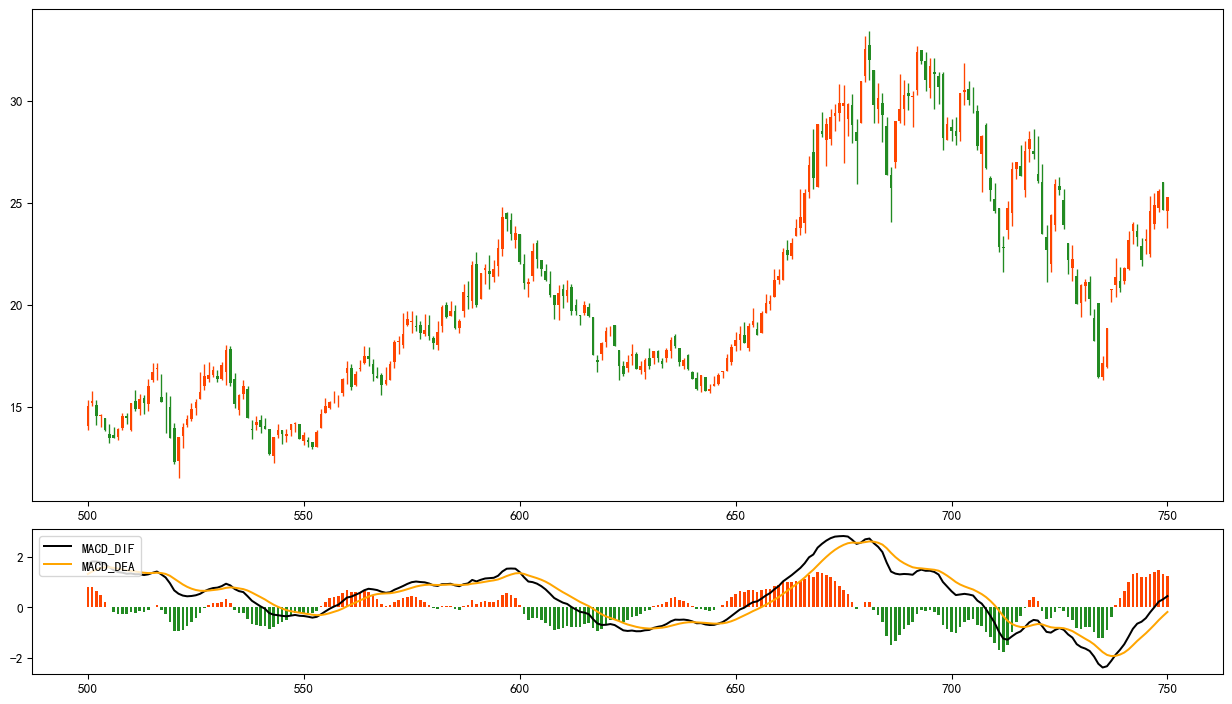

In [11]:
# Matplotlib 绘制数据。
# ##################################################
DrawPDF = StkIndicatorPDF

# 筛选数据: 放大局部数据。
# --------------------------------------------------
#DrawPDF = DrawPDF[(200 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 1500)]
DrawPDF = DrawPDF[(500 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 750)]

# 画布配置。
# --------------------------------------------------
fig = plt.figure(figsize=(16, 9), dpi=96)
Grid = plt.GridSpec(4, 1, figure=fig)

# K 线数据: 红绿 K 线的 Bottom、Height。
# --------------------------------------------------
KLine_Red = DrawPDF[DrawPDF["Change"] >= 0.0]
KLine_Red_Bottom = KLine_Red["Open"]
KLine_Red_Height = KLine_Red["Close"] - KLine_Red["Open"]
# ..................................................
KLine_Gre = DrawPDF[DrawPDF["Change"] <  0.0]
KLine_Gre_Bottom = KLine_Gre["Close"]
KLine_Gre_Height = KLine_Gre["Open"] - KLine_Gre["Close"]

# 绘制数据: 绘制红绿 K 线。
# --------------------------------------------------
ax1 = plt.subplot(Grid[0:3])
ax1.bar(x=KLine_Red["Row_Num"], height=KLine_Red_Height, width=0.6, bottom=KLine_Red_Bottom, color="#FF4500")
ax1.bar(x=KLine_Gre["Row_Num"], height=KLine_Gre_Height, width=0.6, bottom=KLine_Gre_Bottom, color="#228B22")
# ..................................................
ax1.vlines(x=KLine_Red["Row_Num"], ymin=KLine_Red["Low"], ymax=KLine_Red["High"], colors="#FF4500", linewidth=1)
ax1.vlines(x=KLine_Gre["Row_Num"], ymin=KLine_Gre["Low"], ymax=KLine_Gre["High"], colors="#228B22", linewidth=1)

# MACD 数据: 红绿 MACD STICK。
# --------------------------------------------------
MACD_STICK_Red = DrawPDF[DrawPDF["MACD_STICK"] >= 0.0]
# ..................................................
MACD_STICK_Gre = DrawPDF[DrawPDF["MACD_STICK"] <  0.0]

# 绘制数据: 绘制 Marker 标记点。
# --------------------------------------------------
ax2 = plt.subplot(Grid[3:4])
ax2.bar(x=MACD_STICK_Red["Row_Num"], height=MACD_STICK_Red["MACD_STICK"], width=0.6, bottom=0, color="#FF4500")
ax2.bar(x=MACD_STICK_Gre["Row_Num"], height=MACD_STICK_Gre["MACD_STICK"], width=0.6, bottom=0, color="#228B22")
# ..................................................
ax2.plot(DrawPDF["Row_Num"], DrawPDF["MACD_DIF"], color="#000000", label="MACD_DIF")
ax2.plot(DrawPDF["Row_Num"], DrawPDF["MACD_DEA"], color="#FFA500", label="MACD_DEA")

# ##################################################
plt.legend(loc="upper left")
plt.show()